In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [78]:
pd.set_option('display.max_rows',None)

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df = pd.read_csv("covid_19_data.csv")

In [5]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


In [6]:
df.shape

(172480, 8)

In [7]:
#renaming Column names
df.rename(columns={'Country/Region':'Country','ObservationDate':'Date','Province/State':'State'},inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SNo          172480 non-null  int64  
 1   Date         172480 non-null  object 
 2   State        124597 non-null  object 
 3   Country      172480 non-null  object 
 4   Last Update  172480 non-null  object 
 5   Confirmed    172480 non-null  float64
 6   Deaths       172480 non-null  float64
 7   Recovered    172480 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.5+ MB


In [9]:
df.isnull().sum()

SNo                0
Date               0
State          47883
Country            0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [10]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,172480.00,172480.00,172480.00,172480.00
mean,86240.50,33231.56,1050.03,21028.25
std,49790.83,103134.89,3499.44,115659.79
min,1.00,-302844.00,-178.00,-854405.00
25%,43120.75,457.00,6.00,10.00
50%,86240.50,4016.50,76.00,858.00
75%,129360.25,18843.00,554.00,7229.00
max,172480.00,2290891.00,54804.00,5624444.00


In [11]:
# To calculate total confirmed cases overall on a particular date
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()

In [12]:
#To calculate total deaths overall on a particular date
death = df.groupby('Date').sum()['Deaths'].reset_index()

In [13]:
#To calculate total recovered overall on a particular date
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [14]:
confirmed.iplot(kind='bar',x='Date',y='Confirmed')

In [30]:
death.iplot(kind='bar',x='Date',y='Deaths')

In [31]:
recovered.iplot(kind='bar',x='Date',y='Recovered')

In [33]:
from fbprophet import Prophet

In [37]:
#for fbprophet we need to make the data into a specific format which is date=ds(ds is nothing but datestamp),column=y
#prophet takes datestamp in YYYY-MM-DD or YYYY-MM-DD HH:MM:SS

## Prediction for confirmed cases

In [38]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [39]:
confirmed

,ds,y
0,2020-01-22,555.00
1,2020-01-23,653.00
2,2020-01-24,941.00
3,2020-01-25,1438.00
4,2020-01-26,2118.00
...,...,...
315,2020-12-02,64530517.00
316,2020-12-03,65221040.00
317,2020-12-04,65899441.00
318,2020-12-05,66540034.00


In [41]:
model = Prophet(interval_width=0.95)
model.fit(confirmed)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [86]:
future = model.make_future_dataframe(periods=100)

In [87]:
forecast_confirmed = model.predict(future)

In [88]:
forecast_confirmed[['ds','yhat','yhat_lower','yhat_upper']].tail(90)

,ds,yhat,yhat_lower,yhat_upper
330,2020-12-17,70890595.44,69947942.95,71852475.21
331,2020-12-18,71423177.30,70412676.66,72394934.08
332,2020-12-19,71928847.39,70852936.85,72946337.24
333,2020-12-20,72403220.18,71295144.88,73529691.47
334,2020-12-21,72847629.32,71737793.46,73973396.49
335,2020-12-22,73346139.46,72117325.28,74447132.96
336,2020-12-23,73868551.63,72721287.22,75126786.75
337,2020-12-24,74392587.56,73165618.81,75603610.15
338,2020-12-25,74925169.42,73556029.59,76358282.10
339,2020-12-26,75430839.51,74077611.09,76976589.19


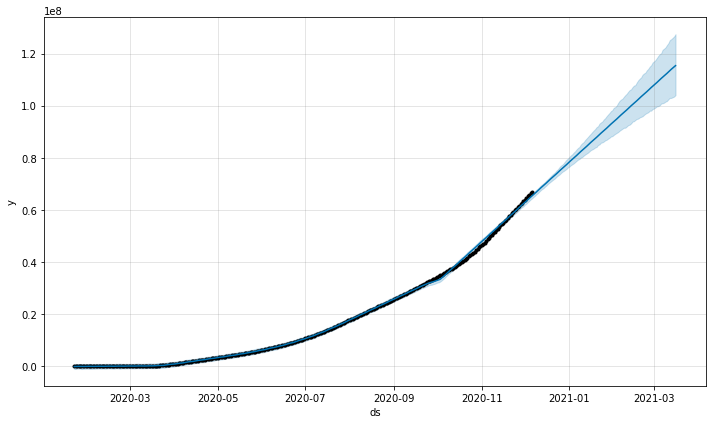

In [89]:
confirmed_forecast_plot = model.plot(forecast_confirmed)

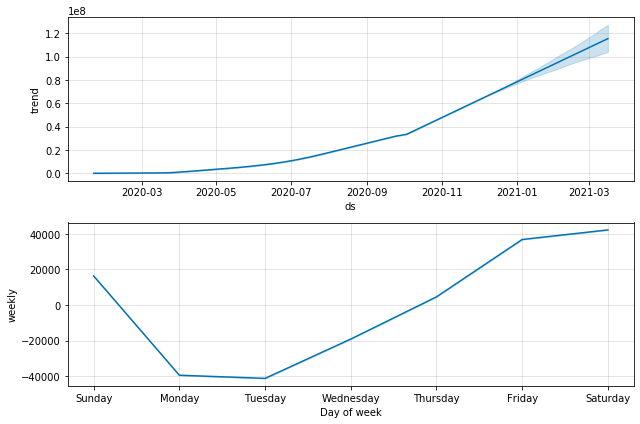

In [90]:
confirmed_forecast_plot_components = model.plot_components(forecast_confirmed)

## Prediction for deaths

In [91]:
death.columns = ['ds','y']
death['ds'] = pd.to_datetime(death['ds'])

In [92]:
death

,ds,y
0,2020-01-22,17.00
1,2020-01-23,18.00
2,2020-01-24,26.00
3,2020-01-25,42.00
4,2020-01-26,56.00
5,2020-01-27,82.00
6,2020-01-28,131.00
7,2020-01-29,133.00
8,2020-01-30,171.00
9,2020-01-31,213.00


In [94]:
model = Prophet(interval_width=0.95)
model.fit(death)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [95]:
future = model.make_future_dataframe(periods=100)
future.tail(100)

,ds
320,2020-12-07
321,2020-12-08
322,2020-12-09
323,2020-12-10
324,2020-12-11
325,2020-12-12
326,2020-12-13
327,2020-12-14
328,2020-12-15
329,2020-12-16


In [96]:
forecast_death = model.predict(future)

In [97]:
forecast_death[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-1521.39,-18725.02,18169.57
1,2020-01-23,-554.01,-18889.38,19167.97
2,2020-01-24,287.37,-17820.77,18463.77
3,2020-01-25,272.94,-18672.45,19808.94
4,2020-01-26,-898.65,-19862.17,17479.86
5,2020-01-27,-2552.39,-20878.05,15976.80
6,2020-01-28,-1737.60,-20488.60,15894.73
7,2020-01-29,-670.68,-21566.90,18812.46
8,2020-01-30,296.71,-20444.60,18368.15
9,2020-01-31,1138.09,-19297.00,19343.93


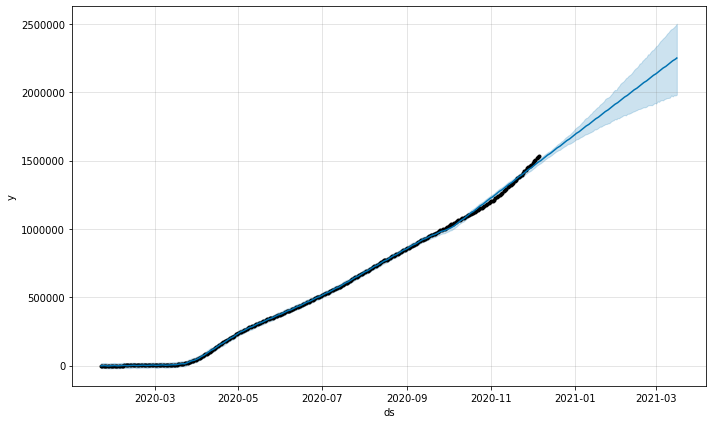

In [98]:
death_forecast_plot = model.plot(forecast_death)

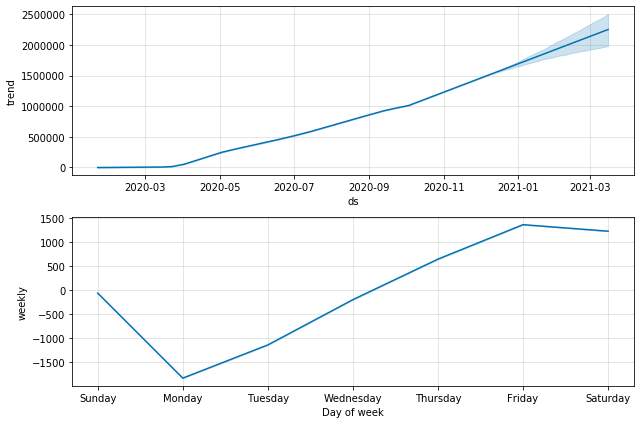

In [99]:
death_forecast_plot_component = model.plot_components(forecast_death)

## Prediction of recovered cases

In [100]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [101]:
recovered

,ds,y
0,2020-01-22,28.00
1,2020-01-23,30.00
2,2020-01-24,36.00
3,2020-01-25,39.00
4,2020-01-26,52.00
5,2020-01-27,61.00
6,2020-01-28,107.00
7,2020-01-29,126.00
8,2020-01-30,143.00
9,2020-01-31,222.00


In [102]:
model = Prophet(interval_width=0.95)
model.fit(recovered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [103]:
future = model.make_future_dataframe(periods=100)
future.tail(100)

,ds
320,2020-12-07
321,2020-12-08
322,2020-12-09
323,2020-12-10
324,2020-12-11
325,2020-12-12
326,2020-12-13
327,2020-12-14
328,2020-12-15
329,2020-12-16


In [104]:
forecast_recovered = model.predict(future)

In [106]:
forecast_recovered[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-33589.02,-635297.47,573626.75
1,2020-01-23,-28990.81,-604633.92,649869.79
2,2020-01-24,-38215.74,-640264.22,560486.58
3,2020-01-25,-12393.41,-635992.88,578268.68
4,2020-01-26,-23831.52,-636447.65,577760.80
5,2020-01-27,-56460.73,-664305.91,526774.38
6,2020-01-28,-38879.00,-630662.06,601840.84
7,2020-01-29,-17704.86,-593669.79,608505.67
8,2020-01-30,-13106.66,-614167.71,551791.43
9,2020-01-31,-22331.58,-622563.55,591375.11


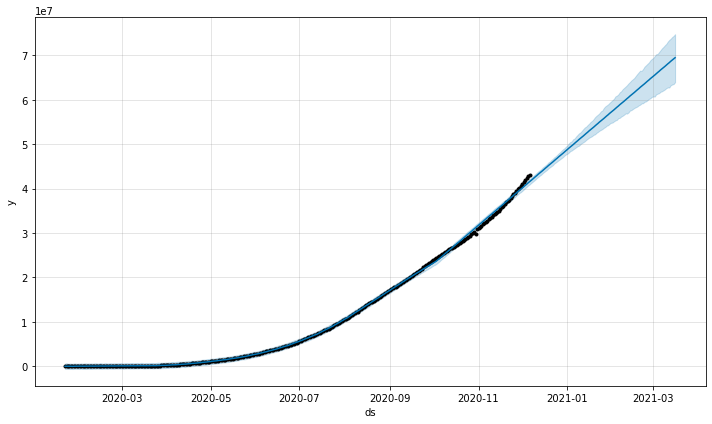

In [107]:
recovered_forecast_plot = model.plot(forecast_recovered)

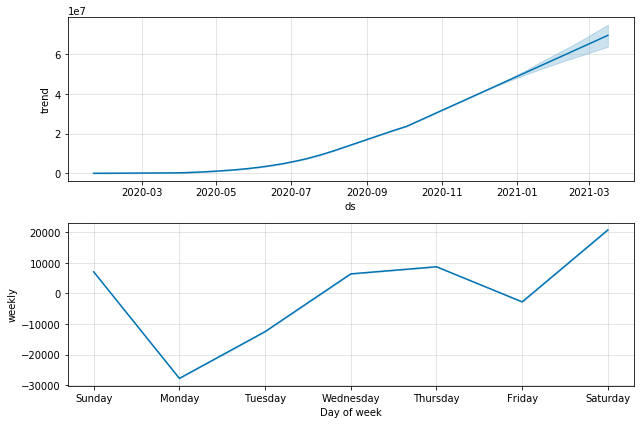

In [108]:
recovered_forecast_plot_component = model.plot_components(forecast_recovered)